In [1]:
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [2]:
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning

# Ignorowanie ostrzeżenia o zbieżności
warnings.simplefilter('ignore', ConvergenceWarning)


data_train = yf.download('BTC-USD', start='2021-01-01', end='2022-12-31')
data_test = yf.download('BTC-USD', start='2023-01-01', end='2023-01-31')

train = data_train['Adj Close']
test = data_test['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [3]:
# Modelowanie ARIMA
model_predictions = []
history = [x for x in train]
predictions = []

history


[29374.15234375,
 32127.267578125,
 32782.0234375,
 31971.9140625,
 33992.4296875,
 36824.36328125,
 39371.04296875,
 40797.609375,
 40254.546875,
 38356.44140625,
 35566.65625,
 33922.9609375,
 37316.359375,
 39187.328125,
 36825.3671875,
 36178.140625,
 35791.27734375,
 36630.07421875,
 36069.8046875,
 35547.75,
 30825.69921875,
 33005.76171875,
 32067.642578125,
 32289.37890625,
 32366.392578125,
 32569.849609375,
 30432.546875,
 33466.09765625,
 34316.38671875,
 34269.5234375,
 33114.359375,
 33537.17578125,
 35510.2890625,
 37472.08984375,
 36926.06640625,
 38144.30859375,
 39266.01171875,
 38903.44140625,
 46196.46484375,
 46481.10546875,
 44918.18359375,
 47909.33203125,
 47504.8515625,
 47105.515625,
 48717.2890625,
 47945.05859375,
 49199.87109375,
 52149.0078125,
 51679.796875,
 55888.1328125,
 56099.51953125,
 57539.9453125,
 54207.3203125,
 48824.42578125,
 49705.33203125,
 47093.8515625,
 46339.76171875,
 46188.453125,
 45137.76953125,
 49631.2421875,
 48378.98828125,
 505

In [4]:
# from pmdarima import auto_arima
# from sklearn.metrics import mean_squared_error
# import numpy as np
# 
# # Automatyczna optymalizacja parametrów ARIMA
# model_auto = auto_arima(history, seasonal=False, stepwise=True)
# print(f"Optymalne parametry ARIMA: {model_auto.order}")
# 
# predictions = []
# for i in range(len(test)):
#     # Dopasowanie modelu ARIMA na podstawie automatycznie dobranych parametrów
#     model_fit = model_auto.fit(history)
#     
#     # Prognozowanie jednego kroku
#     output = model_fit.predict(n_periods=1)
#     yhat = output[0]
#     
#     # Dodanie prognozy do listy
#     predictions.append(yhat)
#     
#     # Aktualizacja historii (dodanie rzeczywistej wartości zamiast prognozowanej)
#     history.append(yhat)
#     
#     print('predicted=%f, expected=%f' % (yhat, test[i]))
# 
# # Obliczenie RMSE dla prognoz
# rmse = np.sqrt(mean_squared_error(test, predictions))
# print(f'RMSE: {rmse}')


In [5]:
p = 5  # Autoregresja (liczba poprzednich wartości do uwzględnienia)
d = 1  # Różnicowanie (stopień stacjonarności)
q = 0  # Średnia ruchoma (liczba poprzednich błędów do uwzględnienia)

print(f"Liczba dni w danych testowych: {len(test)}")
for i in range(len(test)):
 
    model = ARIMA(history, order=(3, 1, 0))
    model_fit = model.fit()
    
    # Prognozowanie jednego kroku
    output = model_fit.forecast()
    yhat = output[0]
    
    # Dodanie prognozy do listy
    predictions.append(yhat)
    
    # Aktualizacja historii (dodanie przewidywanej wartości do danych treningowych)
    history.append(test[i])  # Używamy rzeczywistej wartości zamiast przewidywanej
    # history.append(yhat) 
    
    print('predicted=%f, expected=%f' % (yhat, test[i]))

C:\Users\Michał\AppData\Local\Temp\ipykernel_18072\70651217.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  history.append(test[i])  # Używamy rzeczywistej wartości zamiast przewidywanej
C:\Users\Michał\AppData\Local\Temp\ipykernel_18072\70651217.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('predicted=%f, expected=%f' % (yhat, test[i]))


Liczba dni w danych testowych: 30
predicted=16602.532328, expected=16625.080078
predicted=16625.195293, expected=16688.470703
predicted=16688.437530, expected=16679.857422
predicted=16680.579539, expected=16863.238281
predicted=16863.435469, expected=16836.736328
predicted=16838.418902, expected=16951.968750
predicted=16952.689191, expected=16955.078125
predicted=16956.010743, expected=17091.144531
predicted=17091.753437, expected=17196.554688
predicted=17197.801777, expected=17446.292969
predicted=17447.930226, expected=17934.896484
predicted=17937.645870, expected=18869.587891
predicted=18875.485321, expected=19909.574219
predicted=19921.833173, expected=20976.298828
predicted=20993.475575, expected=20880.798828
predicted=20897.874286, expected=21169.632812
predicted=21175.391067, expected=21161.519531
predicted=21163.921255, expected=20688.781250
predicted=20690.159907, expected=21086.792969
predicted=21082.103299, expected=22676.552734
predicted=22678.952119, expected=22777.625000


RMSE: 524.5822132369719


Text(0.5, 1.0, 'BTC-USD: Rzeczywiste dane vs prognozy dla 2023 (RMSE: 524.58)')

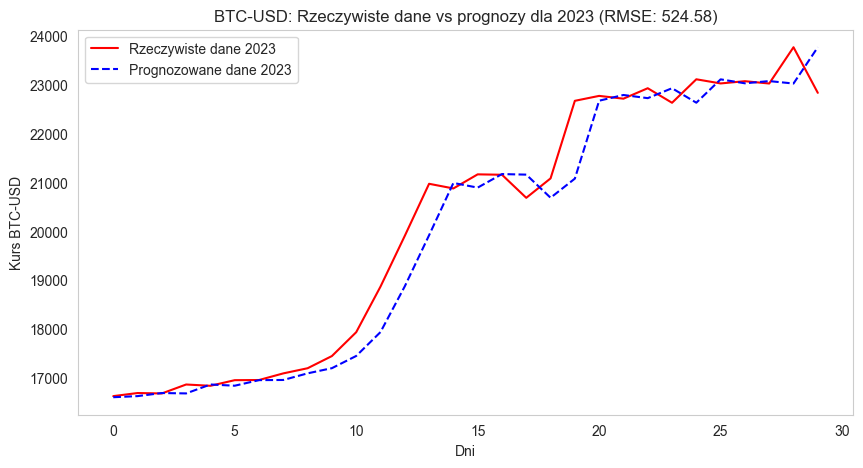

In [6]:
# Obliczenie RMSE dla prognoz
rmse = np.sqrt(mean_squared_error(test, predictions))
print(f'RMSE: {rmse}')

# Rysowanie wykresu porównującego rzeczywiste dane testowe i prognozy
plt.figure(figsize=(10,5))
plt.grid()
plt.xlabel('Dni')
plt.ylabel('Kurs BTC-USD')
plt.plot(test.values, color='red', label='Rzeczywiste dane 2023')
plt.plot(predictions, color='blue', linestyle='--', label='Prognozowane dane 2023')
plt.legend()
plt.title(f'BTC-USD: Rzeczywiste dane vs prognozy dla 2023 (RMSE: {rmse:.2f})')

Importing plotly failed. Interactive plots will not work.
[*********************100%***********************]  1 of 1 completed
15:06:37 - cmdstanpy - INFO - Chain [1] start processing
15:06:38 - cmdstanpy - INFO - Chain [1] done processing


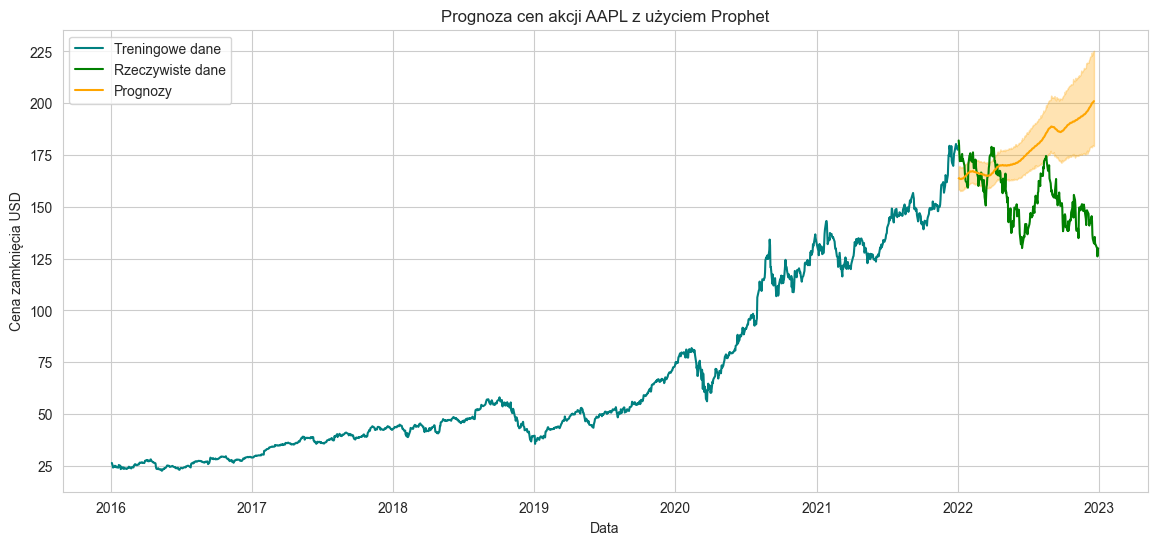

Mean Absolute Error (MAE): 25.60
Mean Squared Error (MSE): 985.64
Root Mean Squared Error (RMSE): 31.39


AttributeError: 'Prophet' object has no attribute 'stan_backend'

In [7]:
# Importowanie bibliotek
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import yfinance as yf
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Pobieranie danych
start_date = '2016-01-01'
end_date = '2022-12-31'
ticker = 'AAPL'
data = yf.download(ticker, start=start_date, end=end_date)
data = data[['Close']].dropna()

# Przygotowanie danych dla Prophet
df = data.reset_index()[['Date', 'Close']]
df.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)

# Podział danych na treningowe i testowe
train = df[df['ds'] < '2022-01-01']
test = df[df['ds'] >= '2022-01-01']

# Inicjalizacja i trenowanie modelu Prophet
model = Prophet(
    daily_seasonality=True,
    yearly_seasonality=True,
    weekly_seasonality=True
)
model.fit(train)

# Tworzenie przyszłych dat na zbiór testowy
future = model.make_future_dataframe(periods=len(test), freq='B')  # 'B' oznacza dni robocze

# Prognozowanie
forecast = model.predict(future)

# Wyodrębnianie prognoz dla zbioru testowego
forecast_test = forecast[forecast['ds'] >= '2022-01-01']

# Wizualizacja prognoz
plt.figure(figsize=(14,6))
plt.plot(train['ds'], train['y'], label='Treningowe dane', color='teal')
plt.plot(test['ds'], test['y'], label='Rzeczywiste dane', color='green')
plt.plot(forecast_test['ds'], forecast_test['yhat'], label='Prognozy', color='orange')
plt.fill_between(forecast_test['ds'], forecast_test['yhat_lower'], forecast_test['yhat_upper'], color='orange', alpha=0.3)
plt.title('Prognoza cen akcji AAPL z użyciem Prophet')
plt.xlabel('Data')
plt.ylabel('Cena zamknięcia USD')
plt.legend()
plt.show()

# Obliczanie metryk błędu
mae = mean_absolute_error(test['y'], forecast_test['yhat'])
mse = mean_squared_error(test['y'], forecast_test['yhat'])
rmse = np.sqrt(mse)

print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')

# Trenowanie modelu na pełnym zbiorze danych
model = Prophet(
    daily_seasonality=True,
    yearly_seasonality=True,
    weekly_seasonality=True
)
model.fit(df)

# Tworzenie przyszłych dat na styczeń 2023 (22 dni robocze)
future_periods = 22
future = model.make_future_dataframe(periods=future_periods, freq='B')

# Prognozowanie
forecast = model.predict(future)

# Wyodrębnianie prognoz na styczeń 2023
forecast_jan2023 = forecast[forecast['ds'] > df['ds'].max()]

# Wizualizacja prognoz
fig1 = model.plot(forecast)
plt.title('Prognoza cen akcji AAPL na styczeń 2023 z użyciem Prophet')
plt.xlabel('Data')
plt.ylabel('Cena zamknięcia USD')
plt.show()

# Wizualizacja tylko prognoz na styczeń 2023
plt.figure(figsize=(14,6))
plt.plot(df['ds'], df['y'], label='Historyczne dane', color='teal')
plt.plot(forecast_jan2023['ds'], forecast_jan2023['yhat'], label='Prognozy', color='orange')
plt.fill_between(forecast_jan2023['ds'], forecast_jan2023['yhat_lower'], forecast_jan2023['yhat_upper'], color='orange', alpha=0.3)
plt.title('Prognoza cen akcji AAPL na styczeń 2023 z użyciem Prophet')
plt.xlabel('Data')
plt.ylabel('Cena zamknięcia USD')
plt.legend()
plt.show()

# Opcjonalnie: Porównanie z Rzeczywistymi Danymi (jeśli dostępne)
# Pobieranie rzeczywistych danych do stycznia 2023
end_date_forecast = '2023-01-31'
data_actual = yf.download(ticker, start='2023-01-01', end=end_date_forecast)
data_actual = data_actual[['Close']].dropna().reset_index()
data_actual.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)

# Porównanie prognoz z rzeczywistymi danymi
forecast_jan2023 = forecast_jan2023.merge(data_actual, on='ds', how='left')

plt.figure(figsize=(14,6))
plt.plot(df['ds'], df['y'], label='Historyczne dane', color='teal')
plt.plot(forecast_jan2023['ds'], forecast_jan2023['yhat'], label='Prognozy', color='orange')
plt.plot(forecast_jan2023['ds'], forecast_jan2023['y'], label='Rzeczywiste dane', color='green')
plt.fill_between(forecast_jan2023['ds'], forecast_jan2023['yhat_lower'], forecast_jan2023['yhat_upper'], color='orange', alpha=0.3)
plt.title('Porównanie prognoz z rzeczywistymi cenami akcji AAPL na styczeń 2023')
plt.xlabel('Data')
plt.ylabel('Cena zamknięcia USD')
plt.legend()
plt.show()

# Obliczanie metryk błędu tylko dla dostępnych rzeczywistych danych
actual = forecast_jan2023.dropna(subset=['y'])
predicted = actual['yhat']
true = actual['y']

mae = mean_absolute_error(true, predicted)
mse = mean_squared_error(true, predicted)
rmse = np.sqrt(mse)

print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
